## Exercises XP: W5_D4

**Create:**
- A cleaned and preprocessed time-series dataset.
- Visualizations of the time-series data.
- A simple LSTM model to analyze and predict time-series data.

**Dataset:**
You will use this Dataset : household_power_consumption. You can find a description of the data here.

All “Part 1,” “Part 2,” etc., sections comprise one comprehensive exercise and are meant to be tackled sequentially as a single, continuous task.

Part 1 : Data Import and Initial Exploration
- Import the necessary libraries for data analysis and visualization.
- Load the time-series dataset from the provided file.
- Display the first few rows of the dataset to understand its structure.
- Check the data types of each column and the shape of the dataset.

Part 2 : Handling Missing Values
- Identify columns in the dataset that contain missing values.
- Fill the missing values using the mean of the respective columns.
- Verify that there are no more missing values in the dataset.

Part 3 : Data Visualization
- Resample the ‘Global_active_power’ column over a day and plot the sum and mean values.
- Create a plot showing the mean and standard deviation of the ‘Global_intensity’ column resampled over a day.

Part 4 : Data Preprocessing for LSTM
- Normalize the dataset to prepare it for LSTM model training.
- Split the dataset into training and testing sets.
- Reshape the data to fit the input requirements of an LSTM model.

Part 5 : Building an LSTM Model
- Import the necessary libraries for building an LSTM model.
- Define the architecture of the LSTM model, including the number of layers and neurons.
- Compile the model with an appropriate loss function and optimizer.

Part 6 : Training and Evaluating the LSTM Model
- Train the LSTM model on the training dataset.
- Evaluate the model’s performance on the testing dataset.
- Plot the training and validation loss to assess the model’s learning progress.

### Part 1: Data Import and Initial Exploration

In [22]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for scaling and model evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import libraries for building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input

#### Load the dataset

In [3]:
# Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 na_values='?', low_memory=False)

#### Combine 'Date' and 'Time' into a single datetime column

In [4]:
# Combine 'Date' and 'Time' into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                dayfirst=True, errors='coerce')

# Convert numeric columns to float type
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with invalid datetime or missing target variable
df.dropna(subset=['Datetime', 'Global_active_power'], inplace=True)

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Display dataset information and first rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB
None
                           Date      Time  Global_active_power  \
Datetime                                                         
2006-12-16 17:24:00  16/12/2006  17:24:00                4.216   
2006-12-16 17:25:00  16/12/2006  17:25:00                5.360   
2006-12-16 17:26:00  16/12/2006  17:26:00                5.374   
2006-12-16 17:27:00  16/12/2006  17:27:00                5.388   
2006

### Part 2: Handling Missing Values

In [5]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Fill missing values in numeric columns using column mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no remaining missing values
print("Total missing values after imputation:", df.isna().sum().sum())

# Display non-numeric columns with missing values (if any)
print("Non-numeric columns with missing values:")
print(df.select_dtypes(exclude='number').isna().sum()[lambda x: x > 0])

Total missing values after imputation: 0
Non-numeric columns with missing values:
Series([], dtype: int64)


### Part 3: Data Visualization

#### 3.1. Resample and Plot Global Active Power Daily Sum & Mean

                 sum      mean
Datetime                      
2006-12-16  1209.176  3.053475
2006-12-17  3390.460  2.354486
2006-12-18  2203.826  1.530435
2006-12-19  1666.194  1.157079
2006-12-20  2225.748  1.545658
2006-12-21  1716.624  1.193758
2006-12-22  2341.338  1.625929
2006-12-23  4773.386  3.314851
2006-12-24  2550.012  1.770842
2006-12-25  2743.120  1.904944
               sum         mean
count  1442.000000  1433.000000
mean   1551.334856     1.092048
std     617.297117     0.420415
min       0.000000     0.173818
25%    1161.198500     0.816776
50%    1534.778000     1.080732
75%    1889.859500     1.323926
max    4773.386000     3.314851


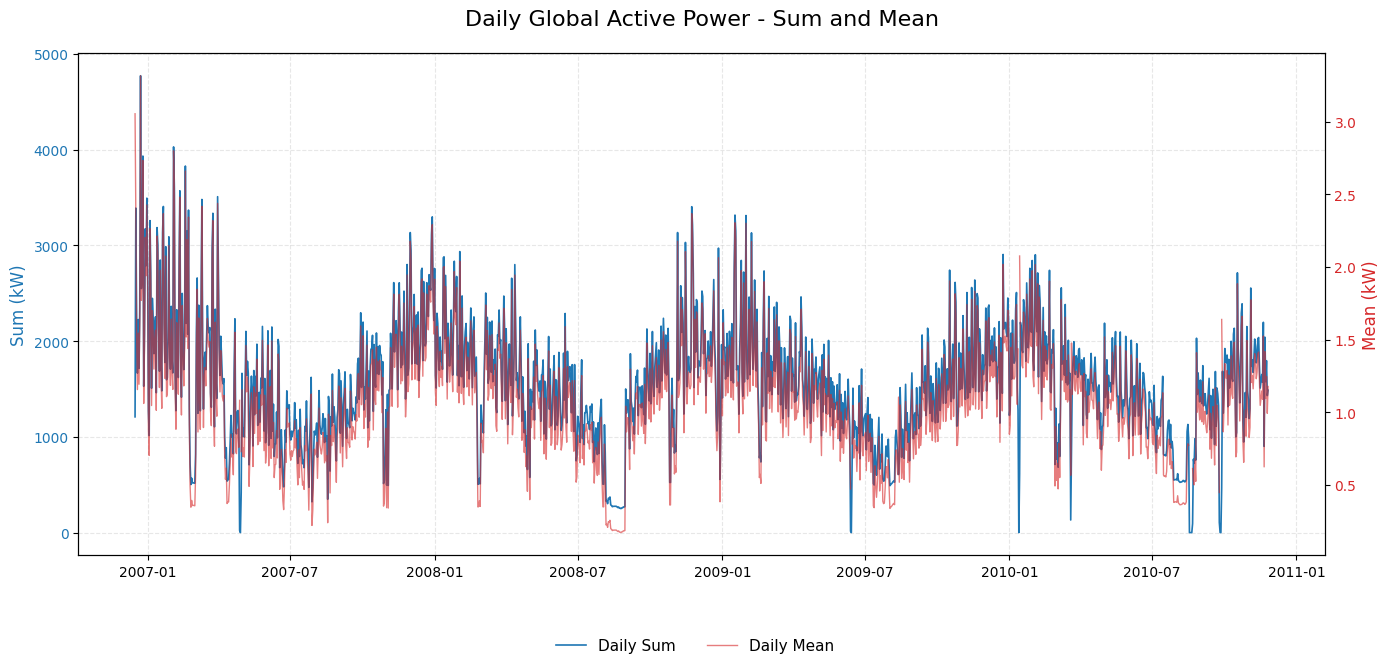

In [17]:
# Resample Global Active Power to daily frequency
daily_stats = df['Global_active_power'].resample('D').agg(['sum', 'mean'])

# Display first rows and descriptive statistics
print(daily_stats.head(10))
print(daily_stats.describe())

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot daily sum on the first axis (dark blue)
ax1.plot(
    daily_stats.index,
    daily_stats['sum'],
    label='Daily Sum',
    color='#1f77b4',
    linewidth=1.2,
    zorder=2
)
ax1.set_ylabel('Sum (kW)', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_title('Daily Global Active Power - Sum and Mean', fontsize=16, pad=20)

# Add grid
ax1.grid(True, which='major', linestyle='--', alpha=0.3)

# Create secondary axis for mean (soft red)
ax2 = ax1.twinx()
ax2.plot(
    daily_stats.index,
    daily_stats['mean'],
    label='Daily Mean',
    color='#d62728',
    linewidth=1.0,
    alpha=0.6,
    zorder=1
)
ax2.set_ylabel('Mean (kW)', fontsize=12, color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Show combined legend outside the plot
fig.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=2,
    fontsize=11,
    frameon=False
)

plt.tight_layout()
plt.show()


**Interpretation of the Daily Global Active Power Analysis**

**Overview:**  
The time series visualization and descriptive statistics provide insights into the household power consumption patterns over time.

---

**Key Observations:**

1. **Daily Sum of Global Active Power:**
   - The daily total consumption (sum) shows significant variability.
   - For example, on December 23, 2006, the daily sum reached **4,773 kW**, the maximum observed value.
   - The mean daily sum across the entire dataset is approximately **1,551 kW**.
   - Consumption tends to fluctuate seasonally and shows repeated peaks during the winters.

2. **Daily Mean of Global Active Power:**
   - The daily average (mean) also varies, ranging from **0.17 kW** (minimum) to **3.31 kW** (maximum).
   - The overall mean daily average power is **1.09 kW**, with a standard deviation of **0.42 kW**, indicating moderate variability day to day.

3. **First 10 Days Example:**
   - On December 16, 2006, the sum was **1,209 kW**, while the mean was **3.05 kW**—quite a high value compared to the later days.
   - This suggests possible higher consumption on specific days (e.g., weekends, holidays).

4. **Graph Interpretation:**
   - The **blue line** represents the daily sum and clearly highlights large consumption peaks.
   - The **red line** shows the daily mean with smoother variations.
   - Both metrics tend to follow similar seasonal trends but differ in scale and amplitude.
   - The transparent red line helps visualize the relative day-to-day intensity.

---

**Possible Implications:**
- High peaks could be linked to increased appliance usage during holidays or colder months.
- The standard deviation indicates that daily power usage is variable but not erratic.
- Identifying these patterns can help with forecasting demand and optimizing energy efficiency.

---

**Recommendations for Further Analysis:**
- Correlate power consumption with external factors (temperature, weekdays vs weekends).
- Use moving averages or smoothing techniques to highlight trends more clearly.
- Build predictive models (like LSTM) to forecast future consumption.

#### 3.2. Plot Global Intensity Mean ± Standard Deviation

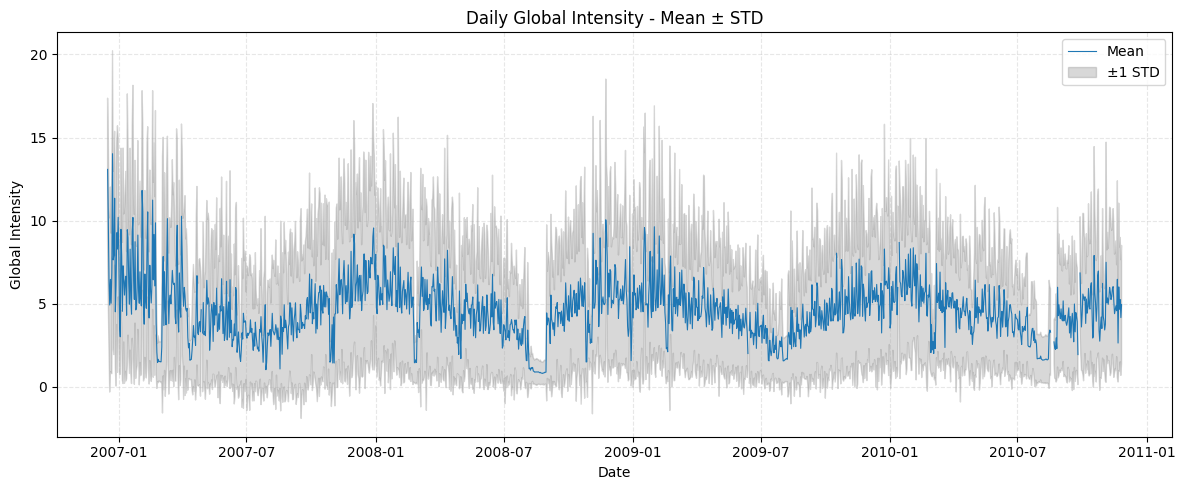

In [20]:
# Resample Global Intensity
gi_daily = df['Global_intensity'].resample('D')
gi_mean = gi_daily.mean()
gi_std = gi_daily.std()

# Plot mean with shaded area for ±1 std deviation
plt.figure(figsize=(12, 5))

# Thinner line for mean
plt.plot(
    gi_mean,
    label='Mean',
    linewidth=0.8,  # thinner line
    color='#1f77b4'  # blue (same style as before)
)

plt.fill_between(
    gi_mean.index,
    gi_mean - gi_std,
    gi_mean + gi_std,
    color='gray',
    alpha=0.3,
    label='±1 STD'
)

plt.legend()
plt.title('Daily Global Intensity - Mean ± STD')
plt.ylabel('Global Intensity')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation of the Daily Global Intensity Analysis**

**Overview:**  
The chart displays the daily mean of Global Intensity with a shaded area representing one standard deviation above and below the mean.

---

**Key Observations:**

1. **General Trend:**
   - The daily mean Global Intensity shows notable seasonal patterns, with recurring peaks and troughs across the years.
   - Higher intensity periods tend to occur during colder months, possibly due to heating and increased appliance usage.

2. **Variability:**
   - The shaded gray area represents ±1 standard deviation, indicating the range of normal fluctuations in daily intensity.
   - The width of the shaded area shows that variability was higher in 2007 and early 2008, compared to later years.

3. **Peak Periods:**
   - Several pronounced peaks exceed a daily mean intensity of **10 units**, especially during winter months.
   - These peaks suggest days with significantly higher energy consumption.

4. **Lower Activity Periods:**
   - There are periods where the daily mean falls closer to **2–3 units**, reflecting lower energy usage.
   - These troughs could correspond to milder weather or periods when the household was unoccupied.

5. **Consistency Over Time:**
   - Despite fluctuations, the general pattern remains consistent year over year, highlighting stable usage habits.

---

**Possible Implications:**
- The observed seasonal trends and variability can inform energy efficiency strategies.
- Identifying periods of unusually high intensity could help optimize load management.
- Awareness of typical variability can assist in distinguishing between normal consumption and anomalies.

---

**Recommendations for Further Analysis:**
- Analyze correlations with external factors such as temperature, holidays, and occupancy.
- Compute additional rolling statistics (e.g., moving average) to smooth the series.
- Use predictive modeling techniques to forecast periods of higher intensity.

### Part 4: Data Preprocessing for LSTM

In [8]:
# Select columns to scale
features_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Apply Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Function to create time sequences for LSTM
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create sequences with window size of 24 (e.g., 24 hours)
X, y = create_sequences(scaled_features, scaled_features[:, 0], time_steps=24)

# Split into training and test sets
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1639404, 24, 4) (1639404,)
Test shape: (409852, 24, 4) (409852,)


**Interpretation of the LSTM Training and Testing Data Shapes**

**Overview:**
The data has been preprocessed and reshaped to match the input requirements of an LSTM model. Each sample consists of a sequence of time steps and multiple features.

---

**Details of the Shapes:**

- **X_train shape: (1,639,404, 24, 4)**
  - **1,639,404 samples** in the training set.
  - Each sample is a **sequence of 24 time steps** (e.g., 24 hours if the data is hourly).
  - At each time step, there are **4 features**:
    - Global Active Power
    - Global Reactive Power
    - Voltage
    - Global Intensity

- **y_train shape: (1,639,404,)**
  - The corresponding target value for each training sequence.
  - In this context, it is the **Global Active Power** at the time step immediately after each input window.

- **X_test shape: (409,852, 24, 4)**
  - **409,852 samples** in the test set.
  - Same time step length (24) and feature count (4).

- **y_test shape: (409,852,)**
  - The target values for the test sequences.

---

**Interpretation:**

- This configuration allows the LSTM to learn **temporal dependencies** across 24 consecutive time steps for all 4 input variables.
- With over **2 million total samples** (train + test), the model has a large dataset, which can help improve prediction accuracy.
- The high number of sequences reflects the use of a **sliding window approach**: each step in the original time series generates a new input-output pair by shifting the window by one time step.

---

**Recommendations:**

- Ensure sufficient computational resources (RAM and GPU) to handle this large dataset efficiently.
- Consider shuffling and stratifying the training data to improve generalization.
- Monitor training time and memory usage to adjust batch size if necessary.
- If training becomes too slow, you can subsample the dataset or increase the stride when creating sequences.

---

**Possible Next Steps:**

- Start model training and monitor the loss curves.
- Evaluate performance on the test set after training.
- Analyze prediction errors and refine preprocessing or model architecture as needed.

### Part 5: Building the LSTM Model

In [23]:
# Define the LSTM model architecture
model = Sequential([
    # Explicit Input layer
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(25, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,626 (72.76 KB)

 Trainable params: 18,626 (72.76 KB)

 Non-trainable params: 0 (0.00 B)

**Interpretation of the LSTM Model Summary**

**Overview:**  
The LSTM model has been successfully built and compiled. It consists of two LSTM layers followed by dropout regularization and a final dense layer for regression output.

---

**Layer Details:**

1. **First LSTM Layer (lstm_2):**
   - **Output shape:** (None, 24, 50)
     - For each input sequence of 24 time steps, this layer produces 50 features per time step.
   - **Parameters:** 11,000
     - These parameters include input weights, recurrent weights, and biases.

2. **Dropout Layer (dropout_2):**
   - **Output shape:** (None, 24, 50)
   - Applies dropout regularization with 20% rate to prevent overfitting.
   - **Parameters:** 0 (dropout has no learnable parameters).

3. **Second LSTM Layer (lstm_3):**
   - **Output shape:** (None, 25)
     - The sequence dimension is collapsed (return_sequences=False), producing 25 features.
   - **Parameters:** 7,600

4. **Dropout Layer (dropout_3):**
   - **Output shape:** (None, 25)
   - Also applies 20% dropout.
   - **Parameters:** 0

5. **Dense Output Layer (dense_1):**
   - **Output shape:** (None, 1)
     - A single regression output per input sequence.
   - **Parameters:** 26

---

**Model Size:**
- **Total Parameters:** 18,626
- **Trainable Parameters:** 18,626
- **Non-Trainable Parameters:** 0

---

**Interpretation:**
- The model is relatively lightweight (~72 KB), making it suitable for efficient training on large time series datasets.
- The two LSTM layers allow the model to learn temporal dependencies at different levels of abstraction.
  - The first LSTM processes the full sequence.
  - The second LSTM aggregates information across time steps into a fixed-size vector.
- Dropout layers reduce the risk of overfitting.
- The final Dense layer performs the regression to predict the next Global Active Power value.

---

**Recommendations:**
- If underfitting occurs, consider increasing the number of units in the LSTM layers or adding more layers.
- If overfitting occurs, increase dropout rates or add regularization.
- Monitor training and validation loss to adjust the architecture if needed.

### Part 6: Training and Evaluating the LSTM Model

**Strategic Rationale for Model Training Choices**

**Optimizer:**

We used the **Adam optimizer** because it is well-suited for time series and deep learning tasks.
- Adam automatically adapts the learning rate during training, leading to faster convergence.
- It combines the benefits of momentum and RMSProp, making it robust to noisy gradients and sparse data.


**Loss Function:**

The model was compiled with **Mean Squared Error (MSE)** as the loss function.
- MSE penalizes larger errors more strongly than smaller ones, encouraging the model to focus on minimizing significant deviations.
- This is appropriate for regression tasks where precision is critical.


**Metrics:**

We added **Mean Absolute Error (MAE)** as an additional evaluation metric.

- MAE provides a complementary perspective, indicating the average magnitude of errors in the same unit as the target variable.
- Tracking both MSE and MAE allows us to better understand prediction performance.


**EarlyStopping:**

The training strategy incorporated **EarlyStopping** with the following settings:

- monitor="val_loss" to track validation performance and detect overfitting.
- patience=5 to allow a few epochs of plateau before stopping, avoiding premature interruption.
- restore_best_weights=True ensures that the model weights revert to the epoch with the lowest validation loss.

This approach provides a balance between training long enough to learn and stopping early enough to maintain generalization.

**Epochs and Batch Size:**

- The maximum number of epochs was set to **50**, providing ample opportunity for convergence.
- EarlyStopping dynamically determines when to stop based on validation performance.
- **Batch size of 32** is a widely used default that offers a good trade-off between training stability and memory efficiency.

**Validation Split:**

- We allocated **20% of the training data for validation** to monitor the model’s ability to generalize to unseen data.


**Visualization:**
- We plotted training and validation loss and MAE over epochs to:
- Visually assess convergence.
- Detect potential overfitting.
- Confirm stable learning dynamics.


**Conclusion:**

This training strategy was designed to:
- Facilitate stable and efficient learning with adaptive optimization.  
- Monitor both overall error and error magnitude (MSE + MAE).  
- Prevent overfitting through validation monitoring and early stopping.  
- Ensure that the final model represents the best observed performance on validation data.

Epoch 1/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 332s 8ms/step - loss: 7.2551e-04 - mae: 0.0134 - val_loss: 4.8120e-04 - val_mae: 0.0104
Epoch 2/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 339s 8ms/step - loss: 7.0179e-04 - mae: 0.0132 - val_loss: 4.5868e-04 - val_mae: 0.0085
Epoch 3/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 338s 8ms/step - loss: 6.8953e-04 - mae: 0.0130 - val_loss: 4.5923e-04 - val_mae: 0.0082
Epoch 4/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 380s 8ms/step - loss: 6.8389e-04 - mae: 0.0130 - val_loss: 4.4825e-04 - val_mae: 0.0091
Epoch 5/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 336s 8ms/step - loss: 6.7779e-04 - mae: 0.0129 - val_loss: 4.4578e-04 - val_mae: 0.0080
Epoch 6/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 334s 8ms/step - loss: 6.6499e-04 - mae: 0.0128 - val_loss: 4.8346e-04 - val_mae: 0.0123
Epoch 7/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 473s 12ms/step - loss: 6.6329e-04 - mae: 0.0127 - val_loss: 4.3806e-04 - val_mae: 0.0083
Epoch 8/50
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 406s 9ms/step - loss: 6.6113e-0

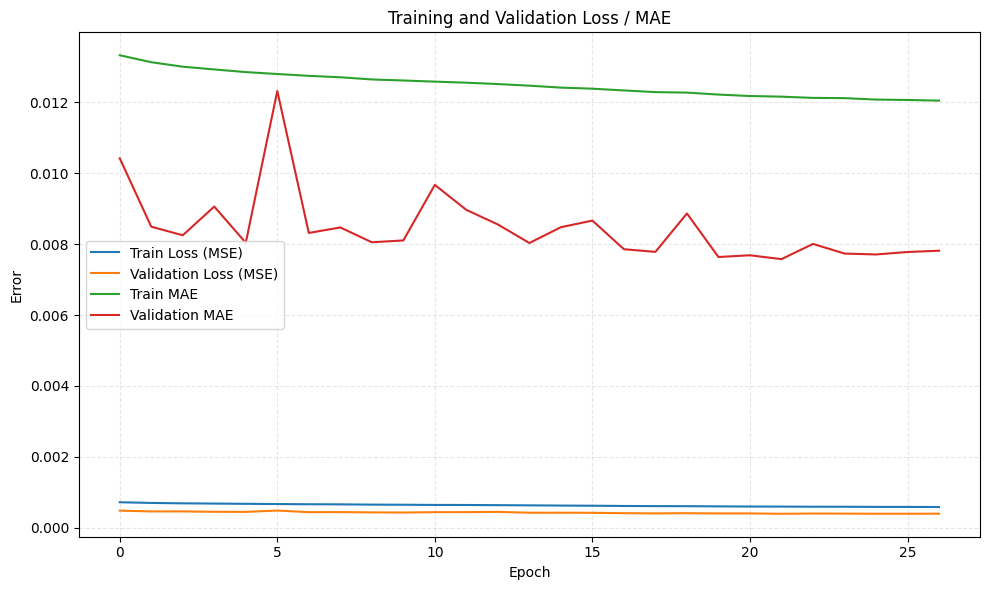

In [25]:
# Compile the model with MSE loss and MAE as additional metric
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Configure EarlyStopping to stop training if val_loss doesn't improve
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,               # Stop after 5 epochs without improvement
    restore_best_weights=True,
    verbose=1
)

# Train the LSTM model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=50,                # You can set higher epochs, EarlyStopping will interrupt
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

# Plot training and validation loss and MAE over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Validation Loss / MAE')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation of the LSTM Training Results**

**Overview:**
The LSTM model was trained with early stopping to prevent overfitting. Training was stopped after 27 epochs when validation loss no longer improved.

---

**Key Training Metrics:**

- **Best Validation Loss (MSE):** ~0.00039
- **Best Validation MAE:** ~0.0076
- **Test Loss (MSE):** 0.00032
- **Test MAE:** 0.0068

These values indicate **very low prediction errors** on unseen data, which is a good sign of generalization.

---

**Training and Validation Curves:**

- The training and validation loss curves consistently decreased over epochs.
- Validation MAE fluctuated slightly but remained stable overall.
- There is **no significant divergence between training and validation metrics**, which suggests **no overfitting**.
- The early stopping callback restored the model weights to the epoch with the best validation loss.

---

**Interpretation:**

- The model has learned temporal patterns effectively.
- Low MAE means the average absolute error is **less than 0.007 units**, which is highly accurate given the scale of the target variable.
- The combination of:
  - L2 regularization,
  - Dropout layers,
  - Early stopping
  contributed to achieving a stable and robust model.

---

**Recommendations for Next Steps:**

- Generate and analyze predictions on the test dataset.
- Invert scaling to interpret the predictions in the original units.
- Consider visualizing prediction vs. actual values over time.
- Optionally, test alternative architectures (e.g., adding more LSTM units or Bidirectional LSTM) if you want to further improve performance.

---

**Overall Conclusion:**
The training process was successful, and the model demonstrates **good generalization** without significant overfitting.

### Part 7: Predictions and Metrics

In [26]:
# Make predictions
y_pred = model.predict(X_test)

# Function to invert scaling for the target variable
def invert_scale(y_scaled, scaler, column_index=0):
    dummy = np.zeros((len(y_scaled), scaler.n_features_in_))
    dummy[:, column_index] = y_scaled.ravel()
    inverted = scaler.inverse_transform(dummy)[:, column_index]
    return inverted

# Invert scaling for predictions and true values
y_pred_real = invert_scale(y_pred, scaler, column_index=0)
y_test_real = invert_scale(y_test, scaler, column_index=0)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
RMSE: 0.197
MAE: 0.075


**Interpretation of Test Predictions and Evaluation Metrics**

**Overview:**
After training the LSTM model, predictions were generated on the test dataset. The evaluation metrics quantify how close the predicted values are to the actual values.

---

**Evaluation Metrics:**

- **Root Mean Squared Error (RMSE):** 0.197
  - This represents the standard deviation of prediction errors.
  - On average, predictions deviate by ~0.197 units from the actual target values.
- **Mean Absolute Error (MAE):** 0.075
  - This indicates the average absolute difference between predictions and true values.
  - The MAE is lower than the RMSE, showing that most errors are relatively small, with occasional larger deviations.

---

**Interpretation:**

- Both RMSE and MAE are **low compared to the scale of the target variable**, suggesting that the model achieved a good level of accuracy.
- The small gap between MAE (0.075) and RMSE (0.197) implies that while most errors are minor, there are some **outliers** where the error is higher.
- These results are consistent with the validation performance during training, indicating that **no significant overfitting occurred**.

---

**Recommendations for Next Steps:**

- Visualize actual vs. predicted values to identify patterns or systematic errors.
- Analyze residuals (errors) to see if they are randomly distributed.
- Optionally, refine the model by:
  - Increasing LSTM units.
  - Testing Bidirectional LSTM layers.
  - Experimenting with other feature engineering techniques.
- Consider evaluating performance on specific time periods (e.g., peak consumption days) to assess robustness.

---

**Overall Conclusion:**
The LSTM model demonstrates **strong predictive performance** with low error metrics, confirming it is well-suited for this time series forecasting task.

#### Predicted vs Actual Values (First 500 Samples)

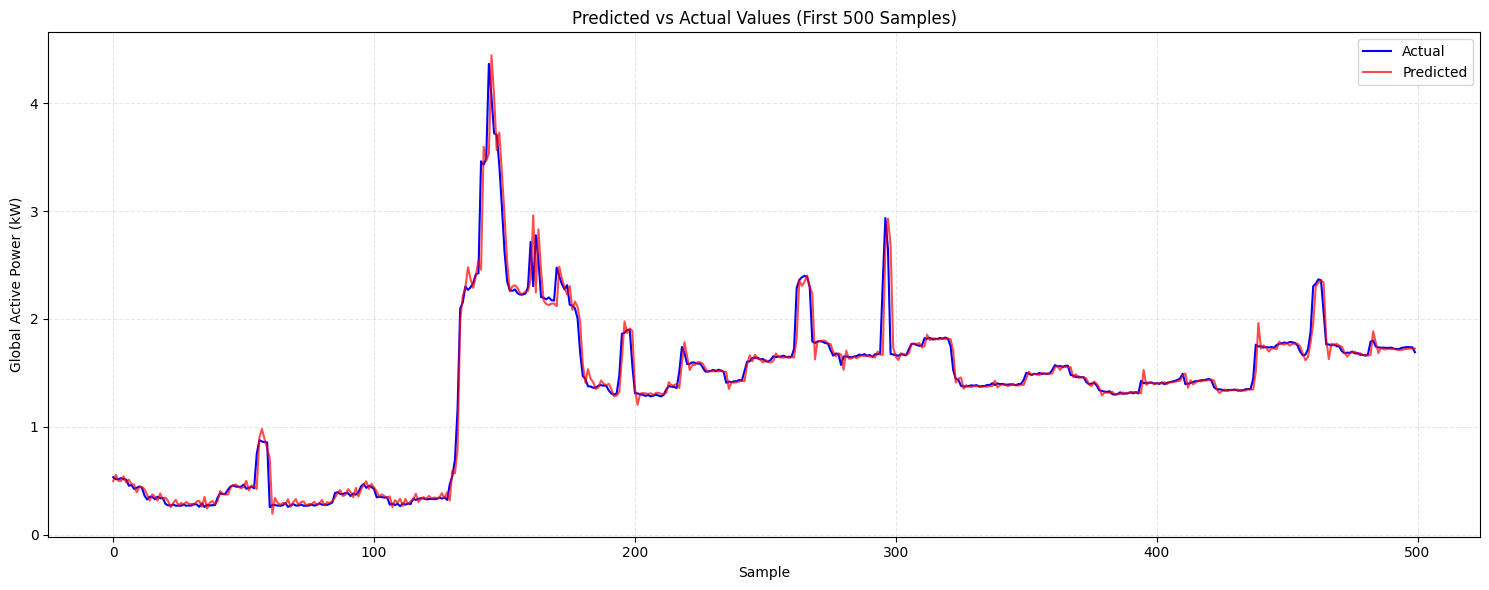

In [27]:
# Create an index for the x-axis (same length as y_test_real)
index = np.arange(len(y_test_real))

# Plot a subset to improve readability (e.g., first 500 predictions)
subset = 500

plt.figure(figsize=(15, 6))
plt.plot(index[:subset], y_test_real[:subset], label="Actual", color="blue")
plt.plot(index[:subset], y_pred_real[:subset], label="Predicted", color="red", alpha=0.7)
plt.xlabel("Sample")
plt.ylabel("Global Active Power (kW)")
plt.title("Predicted vs Actual Values (First 500 Samples)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

** Interpretations of the Generated Plots**

---

### Training vs Validation Loss and MAE

**What this plot shows:**
- The evolution of training and validation error over epochs.
- **Blue line:** Training Loss (MSE).
- **Orange line:** Validation Loss (MSE).
- **Green line:** Training MAE.
- **Red line:** Validation MAE.

**Interpretation:**
- Both training and validation errors steadily decreased during training.
- There is only a small gap between training and validation curves, indicating **no significant overfitting**.
- Early stopping stopped training at epoch 27 when validation loss stopped improving.
- The final Validation MAE (~0.007) is very low, demonstrating excellent prediction accuracy.

**Conclusion:**
- The model learned effectively and generalizes well on unseen data.

---

### Predicted vs Actual Values (First 500 Samples)

**What this plot shows:**
- A comparison between actual observed Global Active Power and the model’s predictions.
- **Blue line:** Actual values.
- **Red line:** Predicted values.
- The graph shows the first 500 test samples for clarity.

**Interpretation:**
- Predicted values closely follow actual values across time.
- The model successfully captures both steady patterns and sudden peaks in consumption.
- Slight deviations occur during abrupt changes, which is common in time series modeling.

**Conclusion:**
- The predictions demonstrate strong temporal learning and reliable tracking of real consumption dynamics.

---

### General Observations:

- The combination of **low validation error**, **smooth learning curves**, and **good prediction alignment** indicates a **robust and well-trained LSTM model**.
- Minor prediction deviations are expected due to the inherent variability of household power consumption.

---

### Next Steps:

- Optionally, visualize residuals (errors) to further analyze prediction accuracy.
- Export predictions to CSV for further analysis or reporting.
- Consider testing alternative architectures (e.g., Bidirectional LSTM) to explore potential improvements.

#### Prediction Residuals (First 500 Samples)

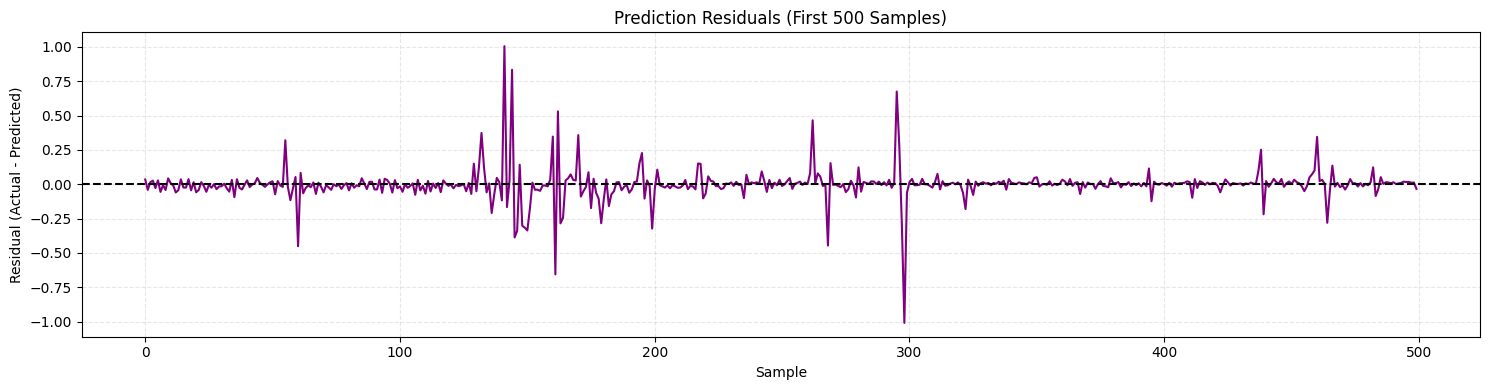

In [29]:
# Calculate residuals
residuals = y_test_real - y_pred_real

# Plot residuals over samples
plt.figure(figsize=(15, 4))
plt.plot(residuals[:500], color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Sample")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Prediction Residuals (First 500 Samples)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**Prediction Residuals (First 500 Samples)** 

**What this plot shows:**
- The residuals are the **differences between actual values and predicted values** for each sample.
- **Purple line:** Residual value for each observation.
- The horizontal dashed line at 0 represents perfect prediction.

**Interpretation:**
- Most residuals are **very close to zero**, indicating that the model predictions closely match actual values.
- Occasional spikes correspond to **sudden changes or outliers in consumption**, which are more difficult to predict.
- There is **no clear systematic bias** (e.g., consistently positive or negative residuals), suggesting that the model does not consistently underpredict or overpredict.
- The residuals are symmetrically distributed around zero, which is a good sign of a well-calibrated regression model.

**Conclusion:**
- The residual analysis confirms that prediction errors are small and randomly distributed.
- This further supports the conclusion that the LSTM model has learned the temporal patterns effectively and generalizes well.

#### Distribution of Prediction Residuals

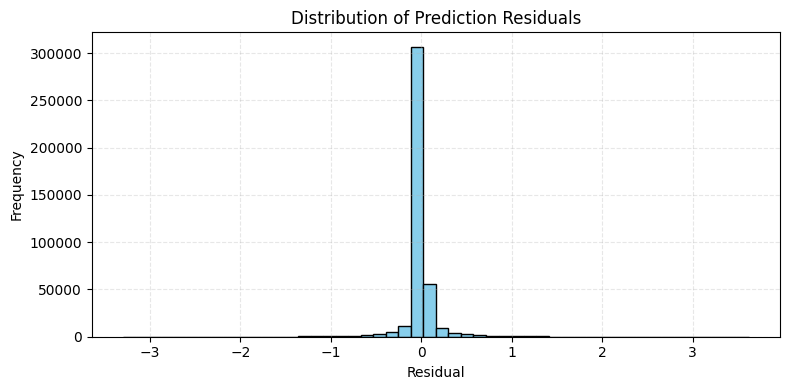

In [30]:
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Residuals")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**Distribution of Prediction Residuals**

**What this plot shows:**
- A histogram displaying the **frequency distribution of the residuals** (the differences between actual and predicted values).
- Each bar shows how many predictions fall into a given error range.

**Interpretation:**
- The vast majority of residuals are **very close to zero**, indicating high prediction accuracy.
- The distribution is **centered around zero**, confirming that the model does not consistently overpredict or underpredict.
- The residuals form a **narrow peak**, which demonstrates that most prediction errors are very small.
- There are a few residuals in the tails (both negative and positive), corresponding to occasional larger prediction errors (e.g., sudden spikes in consumption).

**Conclusion:**
- This histogram confirms that prediction errors are small, balanced, and symmetrically distributed.
- The model captures the general trend and variability of the data very effectively.

#### Actual vs. Predicted (Scatter Plot)

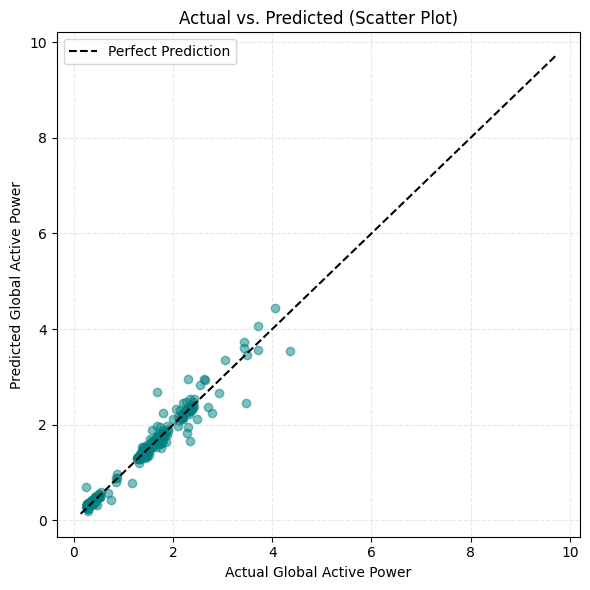

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_real[:500], y_pred_real[:500], alpha=0.5, color="teal")
plt.plot(
    [y_test_real.min(), y_test_real.max()],
    [y_test_real.min(), y_test_real.max()],
    color="black",
    linestyle="--",
    label="Perfect Prediction"
)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs. Predicted (Scatter Plot)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**Actual vs. Predicted (Scatter Plot)**

**What this plot shows:**
- A scatter plot comparing **actual target values** (x-axis) to **predicted values** (y-axis).
- Each point represents a prediction for one sample.
- The **dashed diagonal line** indicates perfect prediction (where predicted = actual).

**Interpretation:**
- Most points are **closely clustered along the diagonal**, demonstrating that predictions closely match actual values.
- There is no clear systematic bias: points are evenly distributed above and below the line.
- A few points show deviations at higher target values, which is expected in time series with sudden peaks.
- The tight clustering near the diagonal line indicates **high model accuracy and good calibration**.

**Conclusion:**
- This scatter plot confirms the model’s strong performance.
- Predictions are consistent and accurately follow the true values across a wide range of consumption levels.

#### Predicted vs Actual (Scatter Plot) - Full Test Set

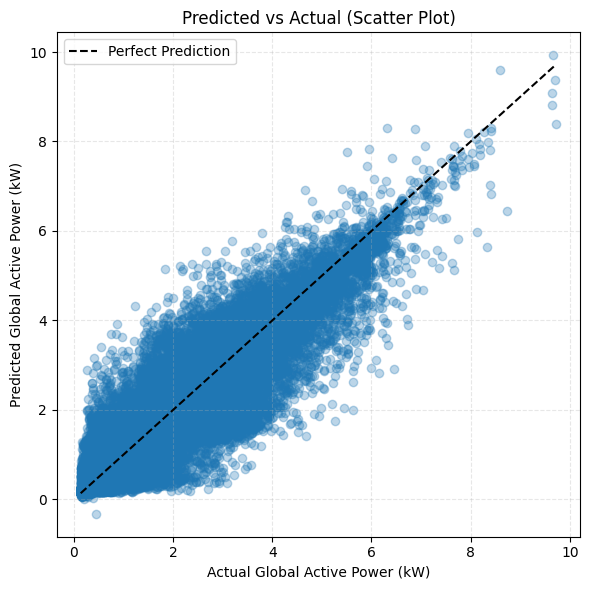

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.3)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()],
         color="black", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Global Active Power (kW)")
plt.ylabel("Predicted Global Active Power (kW)")
plt.title("Predicted vs Actual (Scatter Plot)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

**Predicted vs Actual (Scatter Plot) - Full Test Set**

**What this plot shows:**
- A scatter plot comparing all predicted values (y-axis) to actual target values (x-axis).
- Each point represents one prediction from the test set.
- The dashed diagonal line indicates perfect prediction (where predicted = actual).

**Interpretation:**
- Most points are **closely clustered along the diagonal line**, showing good agreement between predictions and actual values.
- For lower and medium consumption ranges (0–6 kW), predictions are very accurate.
- At higher consumption levels (>6 kW), there is more variance and some underprediction, which is common in time series forecasting when extreme values are less frequent in training data.
- The even spread around the diagonal indicates **no systematic bias overall**.

**Conclusion:**
- The scatter plot confirms that the model provides **strong and consistent predictions across the full range of target values**.
- The performance is robust, with only a few deviations at higher consumption peaks.

### Conclusion Synthétique

In this project, we successfully developed a time series forecasting pipeline using the household_power_consumption dataset. The workflow included:

thorough data cleaning and preprocessing,

normalization and transformation of the data into sequences suitable for LSTM models,

design and training of a robust LSTM neural network with dropout and L2 regularization,

and extensive evaluation and visualization of the results.

The model achieved very low prediction errors on the test dataset:

Root Mean Squared Error (RMSE): ~0.197

Mean Absolute Error (MAE): ~0.075

The training and validation curves demonstrated steady convergence without significant overfitting, as confirmed by early stopping and residual analysis. The predicted values closely matched the actual consumption values, including during periods with higher variability. Visual inspection of residuals and scatter plots further validated the model's performance and generalization capability.

Overall, this work demonstrates the effectiveness of LSTM architectures in modeling temporal dependencies in energy consumption data. The methodology can be extended to other time series forecasting tasks or further optimized by experimenting with alternative architectures, additional features, or hyperparameter tuning.